In [1]:
%reload_ext watermark
%reload_ext autoreload
%autoreload 2
%watermark -v -p numpy,sklearn,pandas
%watermark -v -p cv2,PIL,matplotlib
%watermark -v -p torch,torchvision,torchaudio,pytorch_lightning
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.use_jedi = False

from IPython.display import display, HTML, Javascript
display(HTML('<style>.container { width:%d%% !important; }</style>' % 90))

def _IMPORT_(x):
    try:
        exec(x, globals())
    except:
        pass


CPython 3.6.9
IPython 7.16.1

numpy 1.18.5
sklearn 0.24.0
pandas 1.1.5
CPython 3.6.9
IPython 7.16.1

cv2 4.5.1
PIL 6.2.2
matplotlib 3.3.3
CPython 3.6.9
IPython 7.16.1

torch 1.8.0.dev20210103+cu101
torchvision 0.9.0.dev20210103+cu101
torchaudio not installed
pytorch_lightning 1.2.0


In [2]:
###
### Common ###
###

import sys, os, io, time, random, math
import json, base64, requests
import os.path as osp

_IMPORT_('import numpy as np')
_IMPORT_('import pandas as pd')
_IMPORT_('from tqdm.notebook import tqdm')

def print_progress_bar(x):
    print('\r', end='')
    print('Progress: {}%:'.format(x), '%s%s' % ('▋'*(x//2), '.'*((100-x)//2)), end='')
    sys.stdout.flush()
###
### Torch ###
###

_IMPORT_('import torch')
_IMPORT_('import torch.nn as nn')
_IMPORT_('import torch.nn.functional as F')
_IMPORT_('import torch.optim as O')
_IMPORT_('from torchvision import models as M')
_IMPORT_('from torchvision import transforms as T')
_IMPORT_('from torch.utils.data import Dataset, DataLoader')
###
### Viz Model ###
###

_IMPORT_('import  wandb')
_IMPORT_('import hiddenlayer as hl')
_IMPORT_('from graphviz import Digraph, Source')
_IMPORT_('from torchviz import make_dot')
_IMPORT_('from torchsummary import summary')
###
### Display ###
###

_IMPORT_('import cv2')
_IMPORT_('from PIL import Image')
_IMPORT_('from torchvision.utils import make_grid')
_IMPORT_('import matplotlib.pyplot as plt')
_IMPORT_('import plotly')
_IMPORT_('import plotly.graph_objects as go')

# plotly.offline.init_notebook_mode(connected=False)

def show_video(video_path, width=None, height=None):
    W, H = '', ''
    if width:
        W = 'width=%d' % width
    if height:
        H = 'height=%d' % height
    if video_path.startswith('http'):
        data_url = video_path
    else:
        mp4 = open(video_path, 'rb').read()
        data_url = 'data:video/mp4;base64,' + base64.b64encode(mp4).decode()
    return HTML('<video %s %s controls src="%s" type="video/mp4"/>' % (W, H, data_url))

def show_image(image_path, width=None, height=None):
    W, H = '', ''
    if width:
        W = 'width=%d' % width
    if height:
        H = 'height=%d' % height
    if image_path.startswith('http'):
        data_url = image_path
    else:
        img = open(image_path, 'rb').read()
        data_url = 'data:image/jpg;base64,' + base64.b64encode(img).decode()
    return HTML('<img %s %s src="%s"/>' % (W, H, data_url))


In [ ]:
# Importing OpenCv library
import cv2

# Selecting the web camera connected to the computer to read video
camera = cv2.VideoCapture(0)
# Looping through to retrieve the frames from the video, whenever the camera is on
while camera.isOpened():
    # Saving in respective variables after reading the video data as frame 1 and frame 2
    retrieve, frame1 = camera.read()
    retrieve, frame2 = camera.read()
    # Finding the absolute difference between the frames in order to detect the motion
    difference = cv2.absdiff(frame1, frame2)
    # Converting the colored data into gray scaled data
    gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    # Making the gray scaled data blurred
    blurred = cv2.GaussianBlur(gray,(5,5),0)
    # Setting a threshold to get rid of the noise in the frames
    _, threshold = cv2.threshold(blurred, 20, 225, cv2.THRESH_BINARY)
    # To dilate the required frames
    dilated = cv2.dilate(threshold,None,iterations=3)
    # To find the boxes/contours over the detected motion
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    # Ignoring the smaller differences in motion
    for c in contours:
        if cv2.contourArea(c) < 5000:
            continue
        # If difference is not so large, knowing there coordinates, width and height
        x, y, w, h = cv2.boundingRect(c)
        # Displaying the rectangular box over the difference
        cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        # Playing sound in sync with the detection of the motion
    # Breaking the program when teh user exists by pressing "q"
    
    if cv2.waitKey(10) == ord("q"):
        break
    # Shows the read video data (absolute difference which is in gray scale) on screen
    cv2.imshow("Security Camera", frame1)

In [19]:
DATA_PATH = '/raceai/data/media/videos/repnet_mix_test.mp4'
cap = cv2.VideoCapture(DATA_PATH)
print('frames count:', int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
frames = []
while cap.isOpened():
    ret, frame = cap.read()
    if ret is False:
        break
    frames.append(frame)
cap.release()

frames count: 634


In [20]:
frame1, frame2 = frames[:2]
difference = cv2.absdiff(frame1, frame2)

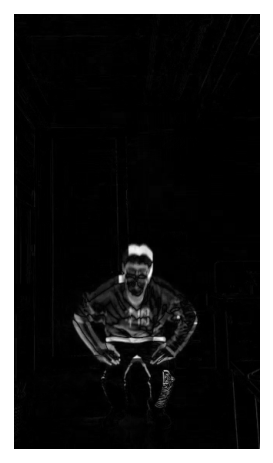

In [28]:
gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray, cmap='gray');

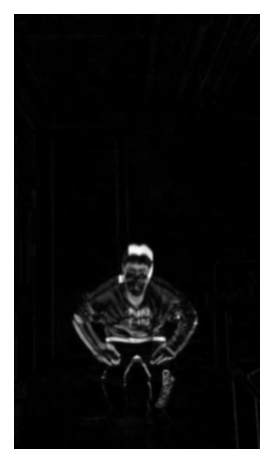

In [30]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.axis('off')
plt.imshow(blurred, cmap='gray');

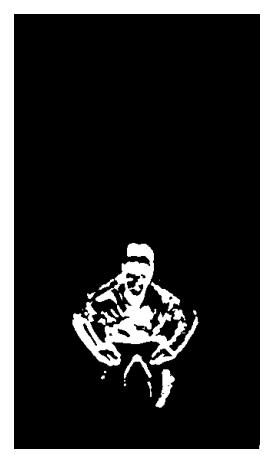

In [32]:
_, threshold = cv2.threshold(blurred, 20, 225, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(threshold, cmap='gray');

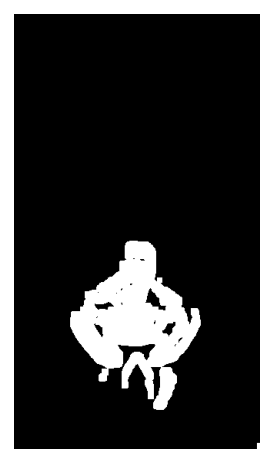

In [33]:
dilated = cv2.dilate(threshold, None, iterations=3)
plt.axis('off')
plt.imshow(dilated, cmap='gray');

In [34]:
contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for c in contours:
    print(cv2.contourArea(c))
    if cv2.contourArea(c) < 5000:
        continue

21.0
18251.5
4.0
2.0
21.5
110.5
184.5
12.0
2.0
2.0
7.5
168.5
2.0
2.0
349.0
7.0
8.5
16.0
4.0
